In [13]:
# %pylab inline  #if you uncomment this, you do not need to specify "np." or "np.linalg." in the code.
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#initial_x = 800000.0  #Initial worth in quatloos (The results you see at the end are for this initial_x.)
#initial_x = 0.0
#initial_x = 50000.0
initial_x = 1000000.0

sal = 60000.0 #salary

# Set up the grid 

t_min = 0
t_max = 30
x_min = 0.0
x_max = 8000000.0 

delta_t = 1.0
delta_x = 10000.0

N_t = int((t_max - t_min)/delta_t + 1.0000001)
N_x = int((x_max - x_min)/delta_x + 1.0000001)
N_u = 4 # Four possible investments

t = np.zeros(N_t)
x = np.zeros(N_x)

for i in range(N_t):
    t[i] = t_min + i*delta_t
for j in range(N_x):
    x[j] = x_min + j*delta_x
    

In [15]:
def next_x_value(i, previous_x, u): #used to plot x and make New_money
    after_govt = previous_x
    
    #Plutocrats in charge
    if(((i>=0)and(i<5))or((i>=20)and(i<25))):
        if(after_govt > 1000000):
            after_govt += 100000
        else:
            after_govt = max(after_govt-50000,0)
                    
    #Revolutionaries in charge
    elif(i == 5 or i==15):         #first year
        if(after_govt > 1000000):
            after_govt = 10000
        elif(after_govt <= 100000):
            after_govt += 1000000
    elif(i ==6 or i==16):          #second year
        if((after_govt > 900000) and (after_govt <= 1000000)):
            after_govt = 10000
    elif(i==7 or i==17):           #third year
        if((after_govt > 800000) and (after_govt <= 900000)):
            after_govt = 10000
    elif(i==8 or i==18):           #fourth year
        if((after_govt > 700000) and (after_govt <= 800000)):
            after_govt = 10000
    elif(i==9 or i==19):           #fifth year
        after_govt += 100000
                
    #Middletarians in charge
    elif(i==10 or i==25):#Middletarians do nothing for their 2-5th years in office
        if(after_govt > 1000000):
            after_govt -= 900000
        elif((after_govt > 100000) and (previous_x <= 1000000)):
            after_govt += 900000
                    
    #Add salary AFTER government action
    after_govt += 60000
            
    #Investments
    if(u==0): #+40k
        return (after_govt+40000)
    elif(u==1): #-90k
        return max(10,after_govt-90000)
    elif(u==2): #increase by 5%
        return (after_govt)*(1.05)
    elif(u==3): #decrease by 15%
        return (after_govt)*(.85)
    

In [16]:
# Determine New_money[i,j,k], which is the amount of money you will have after year i if you start year i
# with x[j] quatloos and use investment k that year.

New_money = np.zeros((N_t,N_x,N_u)) # The money you have after you invest that year (due to investment choice)

# INSERT YOUR CODE HERE!
for i in range(N_t): #year
    for j in range(N_x): #money
        for k in range(N_u): #investment strategy
            New_money[i, j, k] = next_x_value(i, x[j], k)
            

#Then convert New_money to New_index, the index (possibly fractional) for the wealth corresponding to New_money.

New_index = np.zeros((N_t,N_x,N_u)) # Note this is a float, not an integer. It indicates the number of 10,000 
                                    # quatloos owned. So if New_money = $73,000, then New_index = 7.3.
                                    # New_index = 7.3 puts it between index 7 and 8, since x[7]=7 and x[8]=8.
                                    # New_index is defined by the next line of code.

New_index = np.maximum(0,np.minimum(New_money/delta_x, N_x-2))


In [17]:
# Backwards in time pass: Determine the Value function (keeping track of the optimal strategy)

V = np.zeros((N_t,N_x))  # Value function
alpha = np.zeros(N_u)  # Interpolation factor
Utility = np.zeros(N_u) # The optimal utilty is the value function
Opt_u_index = np.zeros((N_t,N_x)).astype('int')  # Optimal investment strategy u to use

#Value at the final time
V[N_t-1,:] = x[:]

#Main loop
for i in range(N_t-2,-1,-1): #time
    for j in range(N_x): #money
        alpha[:] = New_index[i,j,:] - New_index[i,j,:].astype("int")
        Utility[:] = (1-alpha[:])*V[i+1,New_index[i,j,:].astype("int")] + \
                       alpha[:]*V[i+1,New_index[i,j,:].astype("int")+1]  # We interpolate between the two
                                                                         # closest wealth grid points.
        V[i,j] = max(Utility)# INSERT YOUR CODE HERE!
        Opt_u_index[i,j] = np.argmax(Utility)# INSERT YOUR CODE HERE!
           


The optimal final worth at time 30 is $3,397,548 quatloos.



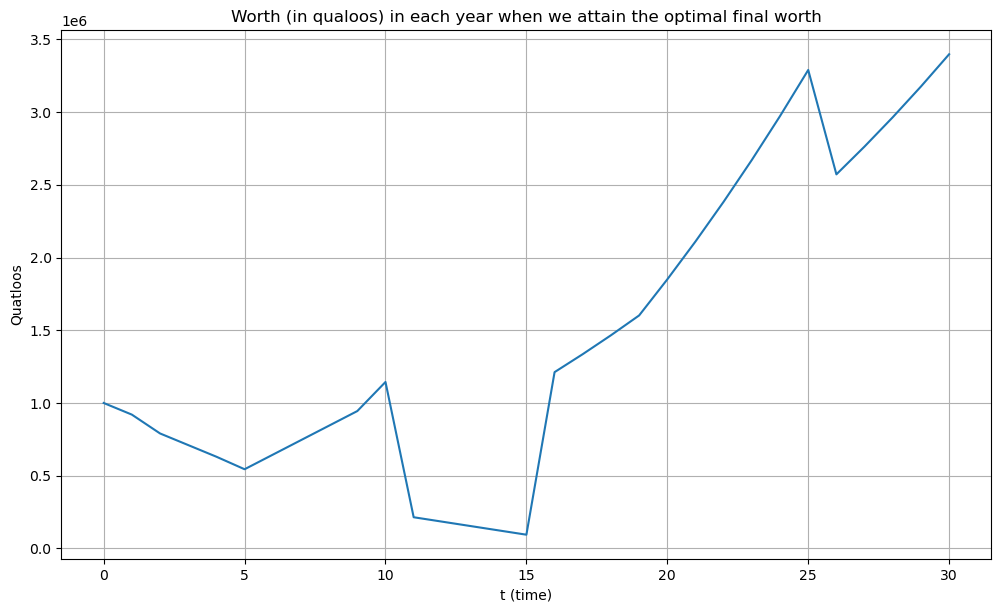

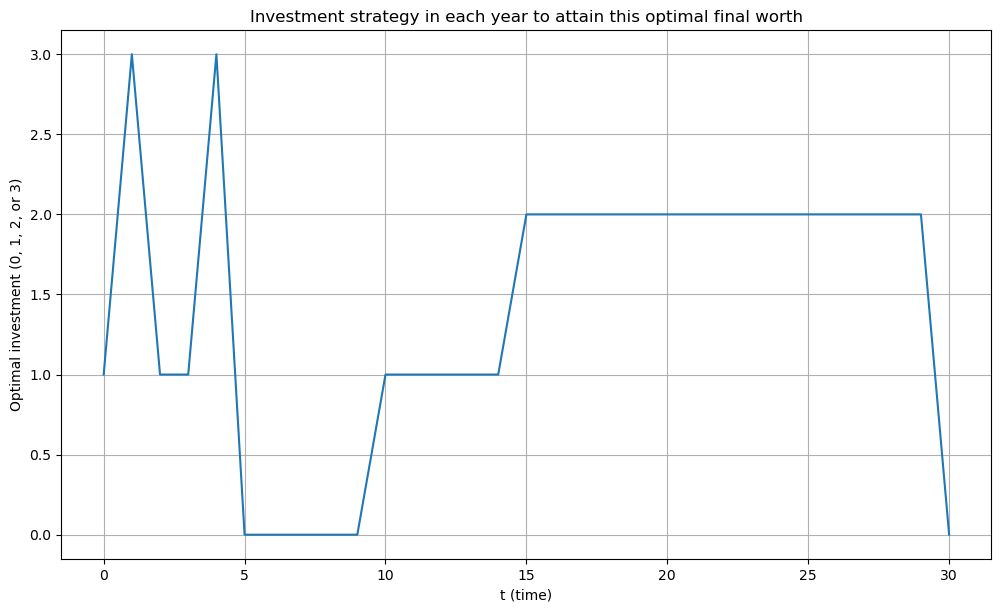

At time 0 you have $1,000,000 quatloos. It is optimal to use The Bank Of Marcus.
At time 1 you have $920,000 quatloos. It is optimal to use Wellington Financial Management and Investments.
At time 2 you have $790,500 quatloos. It is optimal to use The Bank Of Marcus.
At time 3 you have $710,500 quatloos. It is optimal to use The Bank Of Marcus.
At time 4 you have $630,500 quatloos. It is optimal to use Wellington Financial Management and Investments.
At time 5 you have $544,425 quatloos. It is optimal to use Fred's Bank.
At time 6 you have $644,425 quatloos. It is optimal to use Fred's Bank.
At time 7 you have $744,425 quatloos. It is optimal to use Fred's Bank.
At time 8 you have $844,425 quatloos. It is optimal to use Fred's Bank.
At time 9 you have $944,425 quatloos. It is optimal to use Fred's Bank.
At time 10 you have $1,144,425 quatloos. It is optimal to use The Bank Of Marcus.
At time 11 you have $214,425 quatloos. It is optimal to use The Bank Of Marcus.
At time 12 you have $18

In [18]:
# Forwards in time pass: Determining the solution from the optimal strategy.

x_plot = np.zeros(N_t) # x_plot is the number of quatloos each year following the optimal investment strategy
u_plot = np.zeros(N_t).astype("int") # u_plot is the optimal investment strategy followed each year

#Initial condition 
x_plot[0] = initial_x
u_plot[0] = Opt_u_index[0,int(max(0,min(x_plot[0]/delta_x, N_x-2)) + .99999)]  # rounds up the x index if its 
                                                                               # proximity to an integer can't 
                                                                               # be explained by machine 
                                                                               # precision error.
for i in range(N_t-1):
    # INSERT YOUR CODE HERE!
    
    #next_x = New_money[i,int((x_plot[i]/delta_x)),u_plot[i]] #next x
    #next_x_up = New_money[i,int((x_plot[i]/delta_x)+.99999),u_plot[i]] #value of New_money one above
    #adjustment = (((x_plot[i]/delta_x)+.99999) - int((x_plot[i]/delta_x)+.99999)).round(4) #interpolation factor
    #x_plot[i+1] = (1-adjustment)*next_x + (adjustment)*next_x_up
    x_plot[i+1] = next_x_value(i, x_plot[i], u_plot[i])#function defined in code block 3
    u_plot[i+1] = Opt_u_index[i+1,int(max(0,min(x_plot[i+1]/delta_x, N_x-2)) + .99999)]

# Print out results
    
print("")
print("The optimal final worth at time", int(t[N_t-1]),"is ${:,.0f} quatloos.".format(x_plot[N_t-1]))
print("")

plt.figure(figsize=(12, 7), dpi=100)
plt.plot(t, x_plot)
plt.title('Worth (in qualoos) in each year when we attain the optimal final worth')
plt.xlabel('t (time)'); plt.ylabel('Quatloos')
plt.grid()
plt.show()

plt.figure(figsize=(12, 7), dpi=100)
plt.plot(t, u_plot)
plt.title('Investment strategy in each year to attain this optimal final worth')
plt.xlabel('t (time)'); plt.ylabel('Optimal investment (0, 1, 2, or 3)')
plt.grid()
plt.show()

for i in range(N_t-1):
    if u_plot[i]==0:
        print("At time", int(t[i]),"you have ${:,.0f} quatloos. It is optimal to use Fred's Bank.".format(x_plot[i]))
    if u_plot[i]==1:
        print("At time", int(t[i]),"you have ${:,.0f} quatloos. It is optimal to use The Bank Of Marcus.".format(x_plot[i]))
    if u_plot[i]==2:
        print("At time", int(t[i]),"you have ${:,.0f} quatloos. It is optimal to use Bito Wladon's Sound Investments.".format(x_plot[i])) 
    if u_plot[i]==3:
        print("At time", int(t[i]),"you have ${:,.0f} quatloos. It is optimal to use Wellington Financial Management and Investments.".format(x_plot[i]))
print("At time", int(t[N_t-1]),"you have ${:,.0f} quatloos.".format(x_plot[N_t-1]))

